In [1]:
import torch
import math
from linear import Linear
from Sequential import Sequential
from module import Module
from loss import MSELoss
from activation import *
from loss import *
from optim import *
from utils import load_data
from metrics import compute_accuracy
import matplotlib.pyplot as plt

SyntaxError: invalid syntax (utils.py, line 17)

In [ ]:
trainX, trainY, testX, testY = load_data()

In [ ]:
fig, axs = plt.subplots(1,2)

i = 0

for data, labels in zip([trainX, testX], [trainY, testY]):    
    axs[i].scatter(data[:,0], data[:,1], c=['r' if p==0 else 'b' for p in labels.argmax(1)])
    i += 1
plt.show()

In [4]:
def train(model, trainX, trainY, nb_epochs = 250, eta=1e-1, mini_batch_size=100):
    torch.set_grad_enabled(False)
    criterion = MSELoss()
    optimizer = SGD(model, eta, momentum=0.9)
    
    losses = torch.zeros(nb_epochs)
    
    for e in range(nb_epochs):
        loss = 0
        for b in range(0, trainX.size(0), mini_batch_size):
            
            out = model(trainX.narrow(0, b, mini_batch_size))
            
            # Insert fwd + bwd pass in __call__ of criterion
            
            running_loss = criterion(out, trainY.narrow(0, b, mini_batch_size))
            
            loss += running_loss
            
            model.zero_grad()
            
            model.backward(criterion.backward())
            
            optimizer.step()

        if (e+1) % 10 == 0:
            print('Epoch %d/%d: loss = %.4f' % (e+1, nb_epochs, loss))
        
        losses[e] = loss
    return losses

In [5]:
net = Sequential([Linear(2, 25),
                  ReLU(),
                  Linear(25, 25),
                  ReLU(),
                  Linear(25, 25),
                  ReLU(),
                  Linear(25, 25),
                  ReLU(),
                  Linear(25, 2)])

losses = train(net, trainX, trainY, eta=1e-2)

Epoch 10/250: loss = 0.7325
Epoch 20/250: loss = 0.6452
Epoch 30/250: loss = 0.6138
Epoch 40/250: loss = 0.5899
Epoch 50/250: loss = 0.5599
Epoch 60/250: loss = 0.5202
Epoch 70/250: loss = 0.4739
Epoch 80/250: loss = 0.4210
Epoch 90/250: loss = 0.3722
Epoch 100/250: loss = 0.3226
Epoch 110/250: loss = 0.2738
Epoch 120/250: loss = 0.2310
Epoch 130/250: loss = 0.2108
Epoch 140/250: loss = 0.1978
Epoch 150/250: loss = 0.1638
Epoch 160/250: loss = 0.1393
Epoch 170/250: loss = 0.1319
Epoch 180/250: loss = 0.1151
Epoch 190/250: loss = 0.1009
Epoch 200/250: loss = 0.0768
Epoch 210/250: loss = 0.0533
Epoch 220/250: loss = 0.0934
Epoch 230/250: loss = 0.1402
Epoch 240/250: loss = 0.0586
Epoch 250/250: loss = 0.0441


In [6]:
compute_accuracy(net, trainX, trainY), compute_accuracy(net, testX, testY)

(tensor(0.9970), tensor(0.9890))

In [7]:
# A quick correlation matrix for the fans

pred = net(testX).argmax(1)

b00 = (pred == 0) & (testY.argmax(1) == 0)
b01 = (pred == 0) & (testY.argmax(1) == 1)
b10 = (pred == 1) & (testY.argmax(1) == 0)
b11 = (pred == 1) & (testY.argmax(1) == 1)

print(b00.sum(), b01.sum(), b10.sum(), b11.sum())

tensor(483) tensor(3) tensor(8) tensor(506)


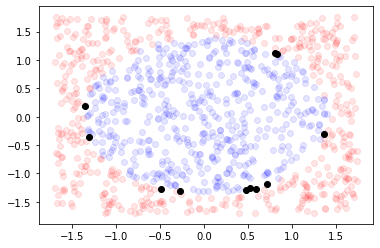

In [8]:
# Plotting scattering of correctly (resp. falsely) predicted values 

correct0 = torch.nonzero(b00==True)
correct1 = torch.nonzero(b11==True)
plt.scatter(testX[correct0,0], testX[correct0, 1], c='r', alpha=0.1)
plt.scatter(testX[correct1,0], testX[correct1, 1], c='b', alpha=0.1)
errors = torch.cat((torch.nonzero(b01==True), torch.nonzero(b10 == True)), dim=0)
plt.scatter(testX[errors,0], testX[errors, 1], c='k')
plt.show()